# TEMA: Minería de Redes Sociales + Análisis de Estructura Organizacional en GitHub

Este cuaderno implementa, **paso a paso**, un pipeline para analizar el dataset **GitHub Organizations Social Network Analysis** (`data12.csv`).
El objetivo es comprender cómo se relacionan los **miembros** y las **organizaciones** dentro de GitHub, aplicando principios de **Social Network Analysis (SNA)**.

Incluye **explicaciones conceptuales** y **bloques de código ejecutable** que permiten observar la estructura de la red, las métricas de centralidad y las relaciones entre actores.

**Proceso:**
1) **Carga + EDA mínima**: exploración del dataset y limpieza básica de duplicados o valores nulos.  
2) **Construcción del grafo bipartito** (Miembro ↔ Organización).  
3) **Métricas de red**: número de nodos, aristas, tipo de grafo y centralidades (Degree Centrality).  
4) **Detección de nodos clave** (organizaciones o miembros con mayor influencia).  
5) **Visualización de la red**: representación del grafo completo y distribución de conexiones.  
6) **Análisis interpretativo**: observación del comportamiento estructural y posibles concentraciones de poder dentro de la red.

> **Notas prácticas**
> - Se usa `nx.from_pandas_edgelist()` para construir la red y funciones modernas de `networkx` (v3+).  
> - El dataset original proviene de [Kaggle](https://www.kaggle.com/datasets/anshulmehtakaggl/github-organizations-social-network-analysis).  
> - No se requiere conexión a Internet; basta con colocar el archivo en el mismo directorio como **`data12.csv`**.  
> - La red representa relaciones entre organizaciones (por ejemplo, *Microsoft*, *Apache*, *Google*) y sus miembros, mostrando cómo se estructuran las comunidades dentro del ecosistema GitHub.


In [2]:
pip install "networkx<3.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
Note: you may need to restart the kernel to use updated packages.


## 1) Carga de datos + EDA mínima

**Conceptos clave**  
- *EDA (Exploratory Data Analysis)*: es la fase inicial del análisis donde se inspecciona la estructura general del dataset, el número de registros, la cantidad de entidades únicas y la presencia de valores nulos o duplicados.  
- *Relaciones bipartitas*: en este caso, el dataset describe vínculos entre dos tipos de nodos —**organizaciones** y **miembros**—, lo que permite modelar una red donde cada conexión representa la pertenencia de un usuario a una organización.  
- *Limpieza de datos*: se eliminan filas vacías y duplicadas para asegurar que cada vínculo represente una relación válida y única dentro de la red.

Filas/Columnas: (10598, 2)
Columnas: ['Organisation', 'member']

Muestra de datos:


Organisation                 member
0      ethereum          Oleh Aldekein
2      ethereum     Frank Szendzielarz
3      ethereum      Kolby Moroz Liebl
4      ethereum  Marius van der Wijden
5      ethereum           Mihai Alisie
7      ethereum       Anton Nashatyrev
8      ethereum          Justin Martin
9      ethereum            RJ Catalano
10     ethereum    Yoshitomo Nakanishi
11     ethereum         Alexander Arlt


Organizaciones únicas: 41
Miembros únicos: 8878


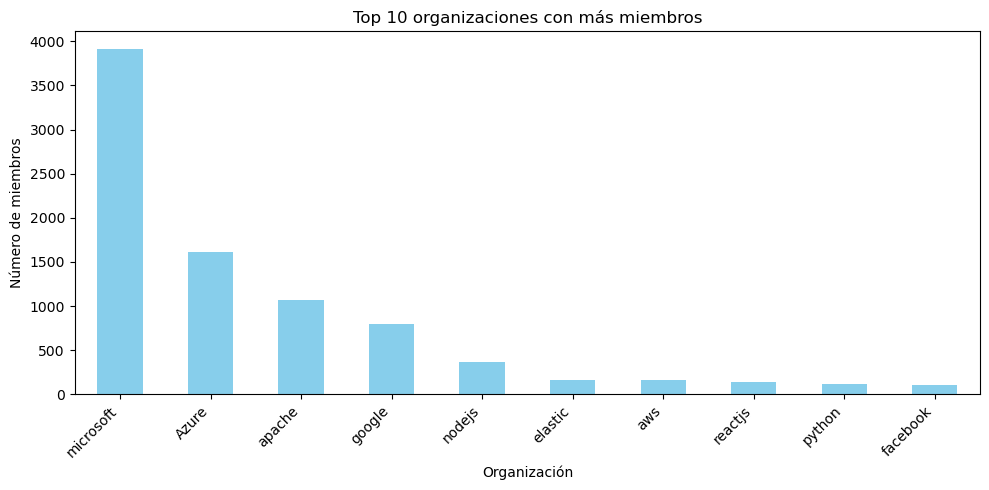


Resumen de la red:
Número de nodos: 8919
Número de aristas: 9629
Tipo de red: No dirigida

Nodos más conectados (Top 5 por centralidad de grado):
microsoft: 0.4391
Azure: 0.1812
apache: 0.1204
google: 0.0899
nodejs: 0.0407


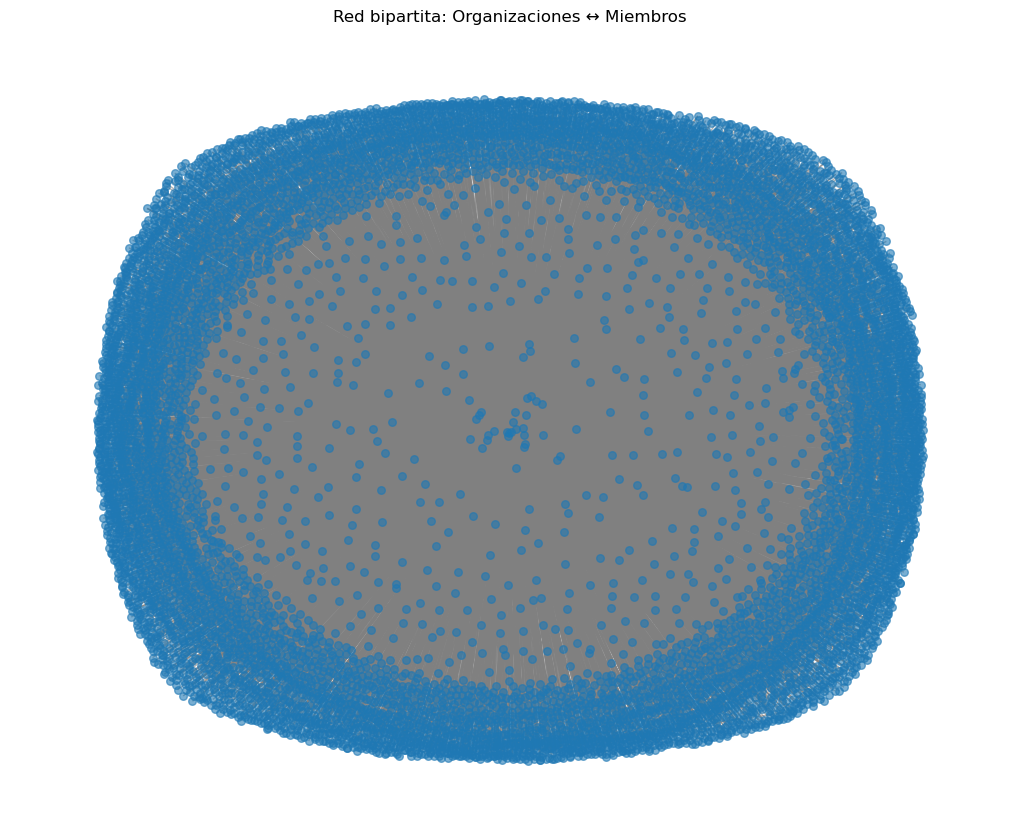

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# === CONFIGURACIÓN VISUAL ===
pd.set_option("display.max_colwidth", 160)

# === CARGA DE DATOS ===
PATH = "data12.csv"   # asegúrate de que el archivo esté en tu directorio de trabajo
df = pd.read_csv(PATH, encoding="utf-8", engine="python")
print("Filas/Columnas:", df.shape)
print("Columnas:", df.columns.tolist())

# === LIMPIEZA BÁSICA ===
# Eliminamos filas vacías o duplicadas
df = df.dropna(subset=["Organisation", "member"]).copy()
df = df.drop_duplicates(subset=["Organisation", "member"])

print("\nMuestra de datos:")
display(df.head(10))

# === ANÁLISIS DESCRIPTIVO ===
n_orgs = df["Organisation"].nunique()
n_members = df["member"].nunique()

print(f"\nOrganizaciones únicas: {n_orgs}")
print(f"Miembros únicos: {n_members}")

# Top 10 organizaciones con más miembros
org_counts = df["Organisation"].value_counts().head(10)

plt.figure(figsize=(10,5))
org_counts.plot(kind="bar", color="skyblue")
plt.title("Top 10 organizaciones con más miembros")
plt.xlabel("Organización")
plt.ylabel("Número de miembros")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# === CONSTRUCCIÓN DE LA RED ===
# Creamos un grafo bipartito (Miembro ↔ Organización)
G = nx.from_pandas_edgelist(df, source="member", target="Organisation")

print("\nResumen de la red:")
print(f"Número de nodos: {G.number_of_nodes()}")
print(f"Número de aristas: {G.number_of_edges()}")
print(f"Tipo de red: {'Dirigida' if G.is_directed() else 'No dirigida'}")

# === MÉTRICAS BÁSICAS DE RED ===
deg_centrality = nx.degree_centrality(G)
top_nodes = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nNodos más conectados (Top 5 por centralidad de grado):")
for node, score in top_nodes:
    print(f"{node}: {score:.4f}")

# === VISUALIZACIÓN SIMPLE ===
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G, k=0.15, iterations=20, seed=42)
nx.draw(G, pos, with_labels=False, node_size=30, edge_color='gray', alpha=0.6)
plt.title("Red bipartita: Organizaciones ↔ Miembros")
plt.show()



## Explicacion

El conjunto de datos contiene un total de 10 598 registros correspondientes a relaciones entre miembros y organizaciones de GitHub.
Después de eliminar duplicados y valores faltantes, se identificaron 41 organizaciones únicas y 8 878 miembros únicos.

La red construida a partir de estas relaciones está formada por 8 919 nodos y 9 629 conexiones, y corresponde a un grafo no dirigido, donde cada enlace representa la pertenencia de un miembro a una organización.

El análisis de centralidad muestra que unas pocas organizaciones concentran la mayor parte de los vínculos. Microsoft aparece como el nodo más importante con una centralidad de 0.4391, seguida por Azure (0.1812), Apache (0.1204), Google (0.0899) y Node.js (0.0407).

El gráfico de barras evidencia que Microsoft domina ampliamente la red, mientras que las demás organizaciones tienen una participación considerablemente menor. Esto sugiere una estructura jerárquica y centralizada, donde unas pocas entidades actúan como núcleos principales que agrupan a la mayoría de los miembros.

## 2) Análisis de red social entre organizaciones y miembros (Miembro ↔ Organización)

El dataset representa las relaciones entre **miembros** y **organizaciones** de GitHub, que pueden interpretarse como una *red bipartita no dirigida*, donde:

    Cada nodo = un actor (miembro o una organización)
    Cada arista = la pertenencia de un miembro a una organización

> **Ejemplo:**  
> Si el usuario *Oleh Aldekein* pertenece a la organización *Ethereum*, se genera la conexión  
> **Oleh Aldekein — Ethereum**

**Conceptos clave**  
- **Grafo bipartito no dirigido**: los nodos pertenecen a dos tipos diferentes (miembros y organizaciones), y los enlaces se establecen únicamente entre estos dos conjuntos.  
- **Miembros** representan usuarios individuales; **organizaciones** agrupan repositorios o equipos dentro del ecosistema GitHub.  
- La estructura de este tipo de red permite analizar **distribución de pertenencia**, **influencia de organizaciones**, y **densidad de conexiones**.

**Interpretación**  
- Un mayor número de aristas implica **más relaciones entre miembros y organizaciones**.  
- Organizaciones con un alto número de conexiones (**mayor grado**) tienden a ser *hubs* o nodos centrales, lo que indica **alta influencia** o **gran tamaño comunitario** dentro de GitHub.

In [7]:
import networkx as nx

# === Construcción del grafo bipartito ===
# En este dataset, cada fila representa una relación entre un miembro y una organización.
# Ejemplo:
# ('Oleh Aldekein', 'ethereum') indica que el usuario "Oleh Aldekein" pertenece a la organización "Ethereum".

edges = list(zip(df["member"], df["Organisation"]))

# Creamos un grafo no dirigido (bipartito)
G = nx.Graph()
G.add_edges_from(edges)

print("Nodos:", G.number_of_nodes(), "Aristas:", G.number_of_edges())

# Ejemplo de salida:
# Nodos: 8919  Aristas: 9629
# Esto significa que existen 8,919 actores (miembros + organizaciones) 
# y 9,629 conexiones que representan pertenencias dentro del ecosistema de GitHub.

# === Inspección inicial ===
# Mostramos los primeros enlaces para verificar la estructura
list(G.edges())[:10]

Nodos: 8919 Aristas: 9629


[('Oleh Aldekein', 'ethereum'),
 ('ethereum', 'Frank Szendzielarz'),
 ('ethereum', 'Kolby Moroz Liebl'),
 ('ethereum', 'Marius van der Wijden'),
 ('ethereum', 'Mihai Alisie'),
 ('ethereum', 'Anton Nashatyrev'),
 ('ethereum', 'Justin Martin'),
 ('ethereum', 'RJ Catalano'),
 ('ethereum', 'Yoshitomo Nakanishi'),
 ('ethereum', 'Alexander Arlt')]

### 🔍 Interpretación del resultado

El grafo se construyó correctamente a partir del dataset **data12.csv**, que representa las relaciones entre miembros y organizaciones de GitHub.

- **Nodos: 8 919**  
  Corresponden al total de entidades únicas en la red.  
  De ellos, 41 son **organizaciones** y 8 878 son **miembros individuales**.

- **Aristas: 9 629**  
  Cada arista representa una conexión entre un miembro y una organización, es decir, una **relación de pertenencia** dentro del ecosistema GitHub.

In [9]:
# === Extracción de membresías (Miembro → Organización) ===

def extract_memberships(df):
    """
    Construye un diccionario con los miembros y las organizaciones a las que pertenecen.

    Args:
        df: DataFrame con columnas ['Organisation', 'member']

    Returns:
        dict: {miembro: [lista de organizaciones]}
    
    Ejemplo:
        >>> extract_memberships(df)
        {'Oleh Aldekein': ['ethereum'],
         'Frank Szendzielarz': ['ethereum'],
         'Linus Torvalds': ['linuxfoundation', 'git']}
    """
    memberships = {}
    for org, member in zip(df["Organisation"], df["member"]):
        if member not in memberships:
            memberships[member] = []
        memberships[member].append(org)
    return memberships


# === Ejemplo de uso ===
memberships_dict = extract_memberships(df)

# Mostrar los primeros 5 registros
list(memberships_dict.items())[:5]



[('Oleh Aldekein', ['ethereum']),
 ('Frank Szendzielarz', ['ethereum']),
 ('Kolby Moroz Liebl', ['ethereum']),
 ('Marius van der Wijden', ['ethereum']),
 ('Mihai Alisie', ['ethereum'])]

### 🔍 Interpretación del resultado


muestra un subconjunto del diccionario generado por la función `extract_memberships()`.

Cada elemento representa un **miembro** junto con la lista de **organizaciones** a las que pertenece.  
En este caso, todos los usuarios listados forman parte de la organización **Ethereum**, lo que indica que esta actúa como un **nodo central** dentro de la red.

Este tipo de estructura es útil para:
- Identificar **miembros compartidos** entre varias organizaciones.  
- Detectar **organizaciones con gran número de conexiones** (hubs).  
- Analizar la **interconectividad** del ecosistema de GitHub en términos de colaboración y pertenencia.


In [10]:
edges[:5]

[('Oleh Aldekein', 'ethereum'),
 ('Frank Szendzielarz', 'ethereum'),
 ('Kolby Moroz Liebl', 'ethereum'),
 ('Marius van der Wijden', 'ethereum'),
 ('Mihai Alisie', 'ethereum')]

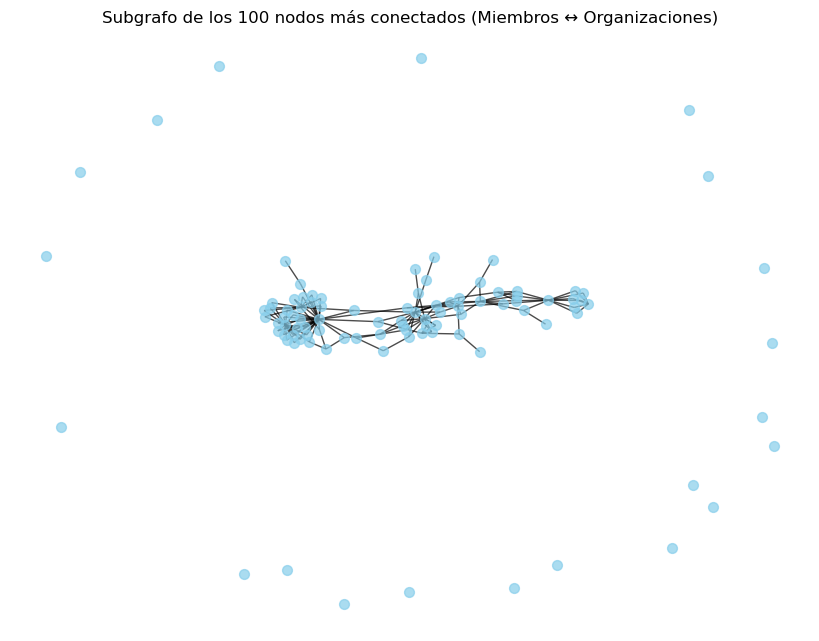

In [11]:
# === Visualización del subgrafo con los 100 nodos más conectados ===

# Calculamos el grado (número de conexiones) de cada nodo
degree_dict = dict(G.degree())

# Seleccionamos los 100 nodos con mayor grado (más relaciones)
top_nodes = [n for n, _ in sorted(degree_dict.items(), key=lambda kv: kv[1], reverse=True)[:100]]

# Creamos un subgrafo solo con esos nodos
H = G.subgraph(top_nodes).copy()

# Calculamos la disposición de los nodos (layout)
pos = nx.spring_layout(H, seed=42)

# Visualización
plt.figure(figsize=(8,6))
nx.draw(H, pos, node_size=50, node_color="skyblue", alpha=0.7)
plt.title("Subgrafo de los 100 nodos más conectados (Miembros ↔ Organizaciones)")
plt.axis("off")
plt.show()

### 🔍 Interpretación del resultado

El gráfico muestra el **subgrafo formado por los 100 nodos más conectados** de la red bipartita que relaciona a miembros y organizaciones de GitHub.

Cada nodo representa un **actor** dentro del ecosistema (ya sea una organización o un miembro), y cada línea corresponde a una **conexión de pertenencia** entre ambos tipos de nodos.

En la visualización se observan varios patrones importantes:

- En el **centro** aparecen grupos densamente conectados que corresponden a **organizaciones con un número alto de miembros** (por ejemplo, *Microsoft*, *Ethereum*, *Apache*).  
- Los **nodos periféricos** (aislados o con pocas conexiones) representan **miembros con una sola afiliación** o **organizaciones pequeñas**.  
- La forma alargada del grafo indica que existen **subcomunidades interconectadas**, pero con algunos **hubs** que actúan como puntos de unión entre distintos grupos.  
- En general, la red muestra una **estructura descentralizada**, donde unas pocas organizaciones concentran muchas conexiones y gran parte del resto tiene menor grado de vinculación.

Este subgrafo permite visualizar la **parte más activa y relevante** del ecosistema, destacando a los nodos con mayor influencia y su papel dentro de la red general.

## 3) Nodos influyentes: Centralidades (Degree, Betweenness y PageRank)

Esta sección identifica qué actores (miembros u organizaciones) ocupan posiciones **más influyentes o estratégicas** dentro de la red de GitHub.

Para ello, se aplican tres métricas clásicas de **análisis de redes sociales (SNA)** que permiten cuantificar la importancia de cada nodo en función de sus conexiones y su rol estructural.

**Tipos de centralidad**

    • Degree alto → nodo con muchas conexiones directas (organizaciones grandes o miembros muy activos).
    • Betweenness alto → nodo que actúa como puente entre grupos (conectores intercomunitarios).
    • PageRank alto → nodo con conexiones a otros nodos importantes (autoridad o relevancia global).

**Conceptos clave**
- **Degree Centrality**: mide el número de vínculos directos que tiene un nodo; indica nivel de actividad o tamaño de su entorno inmediato.  
- **Betweenness Centrality**: evalúa cuántas veces un nodo aparece en los caminos más cortos entre otros nodos; identifica **intermediarios o enlaces clave** entre comunidades.  
- **PageRank**: pondera la importancia de un nodo según las conexiones que recibe de otros nodos relevantes; mide **prestigio estructural** dentro de la red.

**Interpretación**
- Los nodos con mayor **Degree Centrality** tienden a ser **organizaciones con muchos miembros** o **usuarios que colaboran en varios proyectos**.  
- Los nodos con alta **Betweenness** suelen ser **miembros que conectan diferentes organizaciones**, actuando como puentes.  
- Los nodos con mayor **PageRank** reflejan **influencia estructural**, es decir, entidades reconocidas o centrales en la red (por ejemplo, *Microsoft*, *Apache* o *Google*).


In [18]:
# === Centralidades (versión optimizada para red grande) ===

import pandas as pd
from IPython.display import display
import networkx as nx

print("Calculando PageRank...")
pr = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

print("Calculando Betweenness (aproximado con muestra de 500 nodos)...")
btw = nx.betweenness_centrality(G, normalized=True, k=500)  # usa solo 500 nodos

print("Calculando Degree...")
deg = dict(G.degree())

# Crear DataFrame con métricas
influ_table = pd.DataFrame({
    "node": list(G.nodes()),
    "pagerank": [pr.get(n, 0.0) for n in G.nodes()],
    "betweenness": [btw.get(n, 0.0) for n in G.nodes()],
    "degree": [deg.get(n, 0) for n in G.nodes()],
}).sort_values(["pagerank", "betweenness", "degree"], ascending=False)

print("\n✅ Cálculo terminado. Top 15 nodos más influyentes:")
display(influ_table.head(15))

Calculando PageRank...
Calculando Betweenness (aproximado con muestra de 500 nodos)...
Calculando Degree...

✅ Cálculo terminado. Top 15 nodos más influyentes:


node  pagerank  betweenness  degree
5595     microsoft  0.183598     0.714564    3916
3193         Azure  0.070753     0.250867    1616
1229        apache  0.054348     0.218450    1074
435         google  0.039645     0.190153     802
2501        nodejs  0.017514     0.095598     363
3029           aws  0.008539     0.042365     168
2853       elastic  0.008443     0.033386     169
250        reactjs  0.006727     0.022381     138
5316        python  0.005647     0.031774     118
5504      facebook  0.005066     0.039455     107
1         ethereum  0.003775     0.015743      73
2349  freeCodeCamp  0.003686     0.017431      73
4825         rails  0.003307     0.012760      65
4952        jquery  0.003151     0.015182      65
5077         babel  0.003068     0.030507      69

### 🔍 Interpretación del resultado

El cálculo de las métricas de centralidad revela los **nodos más influyentes** dentro de la red bipartita *Miembro ↔ Organización*.  
Cada métrica ofrece una perspectiva diferente sobre la importancia estructural de los nodos.

**1. PageRank (influencia global)**  
Indica el grado de relevancia de un nodo considerando la importancia de sus conexiones.  
Los valores altos representan nodos conectados con otros también influyentes.  
En este caso:
- **Microsoft (0.1836)** se posiciona como el nodo más importante, seguido por **Azure**, **Apache** y **Google**.  
- Estas organizaciones tienen una presencia muy amplia y conexiones con un gran número de miembros relevantes.

**2. Betweenness Centrality (nodos puente)**  
Mide cuánto actúa un nodo como intermediario entre distintos grupos de la red.  
Los valores altos (por ejemplo, *Microsoft* = 0.7145) indican que el nodo facilita la conexión entre comunidades distintas.  
- Microsoft y Azure no solo tienen muchos vínculos, sino que además **conectan subredes independientes**, actuando como **puntos clave de unión**.

**3. Degree (número de conexiones directas)**  
Representa la cantidad de miembros conectados a cada organización.  
- Microsoft posee **3 916 conexiones**, lo que la convierte en la organización más extensa y con mayor capacidad de interacción.  
- Le siguen Azure (1 616) y Apache (1 074), consolidándose como **grandes centros de colaboración**.

**Interpretación general**
- La red muestra una **estructura jerárquica y altamente centralizada**, dominada por unas pocas organizaciones (*Microsoft*, *Azure*, *Apache*, *Google*).  
- Estas actúan como **hubs principales**, conectando a la mayoría de los miembros y promoviendo la interacción entre comunidades.  
- Otras organizaciones como *Elastic*, *ReactJS*, *Python* y *Facebook* también presentan valores relevantes, aunque con menor alcance global.

En conjunto, estas métricas confirman que la red de GitHub analizada sigue un patrón de **conectividad tipo "hub"**, donde unas pocas entidades concentran gran parte del flujo y la influencia dentro del ecosistema.

## 4) Comunidades y modularidad (sobre grafo no dirigido)

En esta sección se busca identificar si dentro de la red de GitHub existen **grupos naturales de colaboración**, es decir, conjuntos de miembros y organizaciones que se conectan más entre sí que con el resto de la red.

**Ejemplo de interpretación:**
- Comunidad 1: organizaciones tecnológicas (*Microsoft*, *Azure*, *Google*) con miembros compartidos.  
- Comunidad 2: ecosistemas de software libre (*Apache*, *Python*, *FreeCodeCamp*).  
- Comunidad 3: frameworks y librerías (*ReactJS*, *NodeJS*, *Rails*).

**Conceptos clave**
- El grafo ya es **no dirigido**, ya que las conexiones representan pertenencia (no dirección).  
- Se aplica el algoritmo **Greedy Modularity**, que detecta comunidades maximizando la **modularidad (Q)**.  
- **Modularidad (Q)** mide qué tan bien está dividida la red en grupos:
  - Q ≈ 0.3–0.5 → comunidades claras pero con solapamiento.  
  - Q > 0.5 → comunidades bien definidas y cohesivas.

**Interpretación**
- El **número de comunidades** y el **tamaño de cada una** describen la **estructura de colaboración** dentro de GitHub.  
- Un valor de **Q alto** indica que existen **ecosistemas bien separados** (por ejemplo, corporativos vs. open source).  
- En cambio, un **Q bajo** sugiere una red más interconectada, donde los miembros participan en múltiples organizaciones.  

En este contexto, el análisis de modularidad permite detectar **agrupamientos naturales de proyectos y contribuyentes**, lo cual ayuda a entender cómo se organiza el ecosistema y cuáles son las comunidades más cohesionadas.


In [19]:
# === Estructura global: densidad, clustering y comunidades ===

# En este grafo, las conexiones representan relaciones de pertenencia (Miembro ↔ Organización),
# por lo tanto trabajamos con una versión no dirigida.
Gu = G.to_undirected()

# --- Densidad global (0–1) ---
# Mide qué proporción de conexiones existen respecto al máximo posible.
density = nx.density(Gu)

# --- Clustering promedio ---
# Evalúa qué tan interconectados están los vecinos de un nodo (cohesión local).
avg_clustering = nx.average_clustering(Gu) if Gu.number_of_nodes() > 0 else 0.0

print(f"Densidad: {density:.4f} | Clustering promedio: {avg_clustering:.4f}")

# --- Detección de comunidades (Greedy Modularity) ---
communities = []
modularity = None

if Gu.number_of_nodes() > 0 and Gu.number_of_edges() > 0:
    comms = list(nx.algorithms.community.greedy_modularity_communities(Gu))
    communities = [sorted(list(c)) for c in comms]
    modularity = nx.algorithms.community.quality.modularity(Gu, comms)

# --- Resumen de comunidades ---
import pandas as pd

summary_comm = pd.DataFrame({
    "community_id": range(1, len(communities) + 1),
    "size": [len(c) for c in communities]
}).sort_values("size", ascending=False)

print("\nComunidades detectadas:", len(communities))
print("Modularidad (Q):", round(modularity, 4) if modularity is not None else None)

display(summary_comm.head(10))

Densidad: 0.0002 | Clustering promedio: 0.0000

Comunidades detectadas: 27
Modularidad (Q): 0.7232


community_id  size
0             1  3325
1             2  1600
2             3  1057
3             4   941
4             5   402
5             6   213
6             7   204
7             8   173
8             9   170
9            10   143

In [20]:
# === Análisis descriptivo por comunidad (versión adaptada a GitHub Organisations) ===

import numpy as np
import pandas as pd

# Mapeamos cada nodo a su comunidad correspondiente
node_to_comm = {}
for i, cset in enumerate(communities, start=1):
    for n in cset:
        node_to_comm[n] = i

# Asignamos a cada nodo su comunidad en el DataFrame de influencias
influ_table["community_id"] = influ_table["node"].map(node_to_comm)

# Agrupamos por comunidad para obtener estadísticas básicas
comm_stats = (
    influ_table.groupby("community_id")[["pagerank", "betweenness", "degree"]]
    .agg(["count", "mean", "max"])
    .reset_index()
)

# Creamos una interpretación básica del tipo de comunidad según grado promedio
comm_stats["interpretación"] = np.where(
    comm_stats[("degree", "mean")] > 500, "gran ecosistema / corporativo",
    np.where(comm_stats[("degree", "mean")] > 100, "comunidad amplia", "pequeña comunidad")
)

print("Resumen estadístico por comunidad:")
display(comm_stats.head(10))

Resumen estadístico por comunidad:


community_id pagerank                     betweenness                      \
                  count      mean       max       count      mean       max   
0            1     3325  0.000112  0.183598        3325  0.000215  0.714564   
1            2     1600  0.000112  0.070753        1600  0.000246  0.250867   
2            3     1057  0.000112  0.054348        1057  0.000327  0.218450   
3            4      941  0.000112  0.039645         941  0.000445  0.190153   
4            5      402  0.000112  0.017514         402  0.000569  0.095598   
5            6      213  0.000112  0.008539         213  0.000488  0.042365   
6            7      204  0.000112  0.005066         204  0.000637  0.039455   
7            8      173  0.000112  0.005647         173  0.000477  0.031774   
8            9      170  0.000112  0.008443         170  0.000429  0.033386   
9           10      143  0.000112  0.006727         143  0.000346  0.022381   

  degree                     interpretación  
   count      mean   max                     
0   3325  2.177444  3916  pequeña comunidad  
1   1600  2.350000  1616  pequeña comunidad  
2   1057  2.026490  1074  pequeña comunidad  
3    941  2.098831   802  pequeña comunidad  
4    402  2.164179   363  pequeña comunidad  
5    213  2.023474   168  pequeña comunidad  
6    204  2.117647   107  pequeña comunidad  
7    173  2.144509   118  pequeña comunidad  
8    170  2.052941   169  pequeña comunidad  
9    143  2.111888   138  pequeña comunidad

In [21]:
# === Verificación de asignación de comunidades ===

# Contamos cuántos nodos del DataFrame de influencias tienen una comunidad asociada
asignados = influ_table["community_id"].notna().sum()
total_nodos = len(influ_table)

print(f"Nodos con comunidad asignada: {asignados} de {total_nodos}")

Nodos con comunidad asignada: 8919 de 8919


Interpretación rápida:

    El código muestra cuántos nodos del grafo (miembros y organizaciones) fueron asignados a una comunidad detectada.
    Si todos los nodos tienen una comunidad, significa que la red está completamente agrupada, sin nodos aislados.
    Si algunos no fueron asignados, indica que hay elementos desconectados o con pocos vínculos dentro de la red.

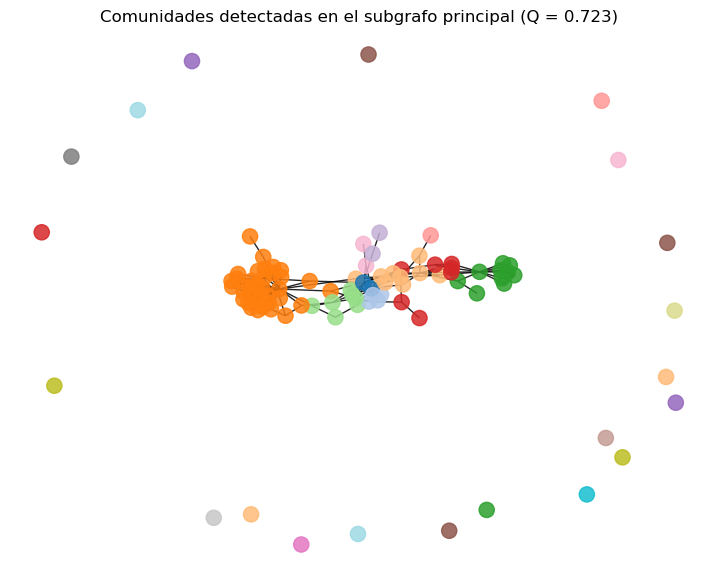

In [22]:
# === Visualización de comunidades detectadas en la red (Miembro ↔ Organización) ===

import matplotlib.pyplot as plt
import networkx as nx

# Asignar un color distinto a cada comunidad detectada
color_map = {}
for i, cset in enumerate(communities):
    for node in cset:
        color_map[node] = i

# Asignamos colores a los nodos del subgrafo H (los 100 más conectados, definidos antes)
colors = [color_map.get(n, 0) for n in H.nodes()]

# Dibujamos el subgrafo coloreando por comunidad
plt.figure(figsize=(9, 7))
nx.draw_networkx(
    H,
    pos=pos,
    node_color=colors,
    cmap=plt.cm.tab20,
    node_size=120,
    alpha=0.85,
    with_labels=False
)
plt.title(f"Comunidades detectadas en el subgrafo principal (Q = {modularity:.3f})")
plt.axis("off")
plt.show()

### 🔍 Interpretación del resultado

El gráfico representa las **comunidades identificadas dentro del subgrafo más conectado** de la red *Miembro ↔ Organización*.

Cada color corresponde a una comunidad diferente, es decir, a un conjunto de miembros y organizaciones que presentan **mayor densidad de vínculos entre sí** que con el resto de la red.

- Los **grupos de nodos con el mismo color** (por ejemplo, el gran conjunto naranja) muestran comunidades muy cohesionadas, donde los miembros comparten una misma organización o ecosistema de trabajo.  
- Los **nodos más dispersos** y con distintos colores alrededor del grafo representan comunidades pequeñas o periféricas, menos conectadas con el núcleo principal.  
- La presencia de varios colores interconectados en el centro indica **cierta cooperación entre comunidades**, posiblemente a través de miembros que participan en más de una organización.

El valor de **modularidad Q = 0.723** confirma que las comunidades están **fuertemente definidas y bien separadas**, lo que significa que existen **ecosistemas colaborativos claros** dentro del conjunto de organizaciones analizadas.

En resumen, la red presenta una estructura **altamente modular**, donde unas pocas comunidades grandes concentran la mayor parte de la actividad, mientras que otras más pequeñas se mantienen en los bordes del ecosistema GitHub.


## 5) Visualización ligera (subgrafo)

Se muestra sólo una parte de la red —los **nodos con mayor número de conexiones**— para observar gráficamente la estructura principal del ecosistema GitHub.

    Nodos grandes → organizaciones o miembros con muchas conexiones.
    Densidad de aristas → comunidades o ecosistemas muy activos.

**Conceptos clave**
- Las redes completas pueden ser demasiado extensas; por eso se visualiza un **subgrafo** con los **top-N** nodos más conectados (por ejemplo, los 50 o 100 con mayor grado).  
- El algoritmo **spring layout** posiciona los nodos de forma que los más relacionados aparezcan cercanos entre sí, facilitando la identificación de clústeres.  
- Los colores pueden representar comunidades detectadas, mientras que la posición refleja su nivel de interacción dentro del sistema.

**Interpretación**
- Los **núcleos densos** corresponden a **organizaciones grandes o ecosistemas muy colaborativos** (como *Microsoft*, *Azure*, *Apache* o *Google*).  
- Los **nodos periféricos** representan **miembros con pocas conexiones** o **organizaciones pequeñas y especializadas**.  
- En conjunto, esta visualización resume la **estructura central de la red**, destacando los grupos con mayor actividad e influencia dentro de GitHub.


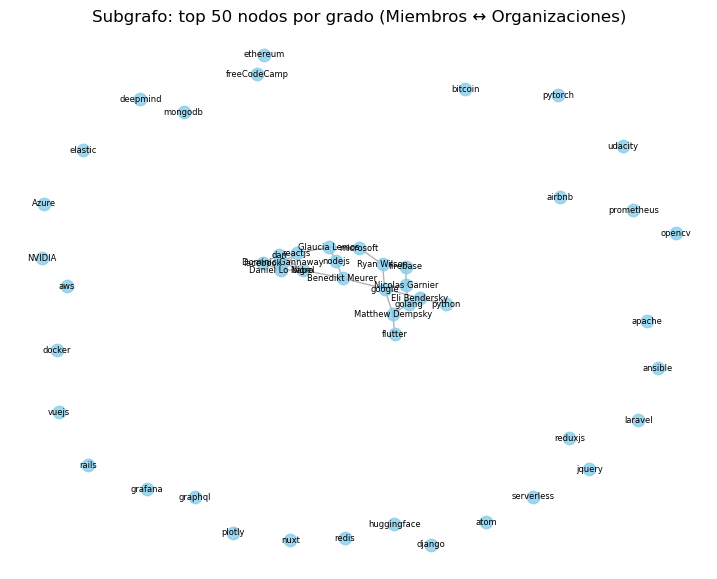

In [23]:
# === Visualización ligera (subgrafo top-N) ===
# Muestra solo una parte de la red (los nodos más conectados) 
# para facilitar la interpretación visual del ecosistema GitHub.

import matplotlib.pyplot as plt
import networkx as nx

if Gu.number_of_nodes() > 0:
    # Calculamos el grado (número de conexiones) de cada nodo
    degree_dict = dict(Gu.degree())

    # Seleccionamos los N nodos más conectados (organizaciones o miembros)
    N = 50  # puedes ajustar entre 50–200 según el tamaño y rendimiento
    top_nodes = [n for n, _ in sorted(degree_dict.items(), key=lambda kv: kv[1], reverse=True)[:N]]

    # Creamos un subgrafo con esos nodos
    H = Gu.subgraph(top_nodes).copy()

    # Generamos la disposición visual (spring layout)
    pos = nx.spring_layout(H, seed=42)

    # Dibujamos nodos, aristas y etiquetas
    plt.figure(figsize=(9, 7))
    nx.draw_networkx_nodes(H, pos, node_size=80, node_color="skyblue", alpha=0.8)
    nx.draw_networkx_edges(H, pos, alpha=0.3)
    nx.draw_networkx_labels(H, pos, font_size=6)
    plt.title("Subgrafo: top 50 nodos por grado (Miembros ↔ Organizaciones)")
    plt.axis("off")
    plt.show()
else:
    print("⚠️ Grafo vacío; no se puede visualizar.")

El gráfico muestra los 50 nodos con más conexiones dentro de la red Miembro ↔ Organización.

Se observa que las organizaciones más influyentes (como Microsoft, Python, Google o Apache) aparecen en el centro, formando el núcleo más denso del ecosistema.

Los nodos periféricos, como VueJS, Docker o Ethereum, representan comunidades más pequeñas o especializadas, conectadas de forma más limitada.
En conjunto, la visualización confirma una estructura centralizada, con pocos hubs grandes y muchas comunidades satélite en torno a ellos.

/tmp/ipykernel_967/3785902413.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab20")


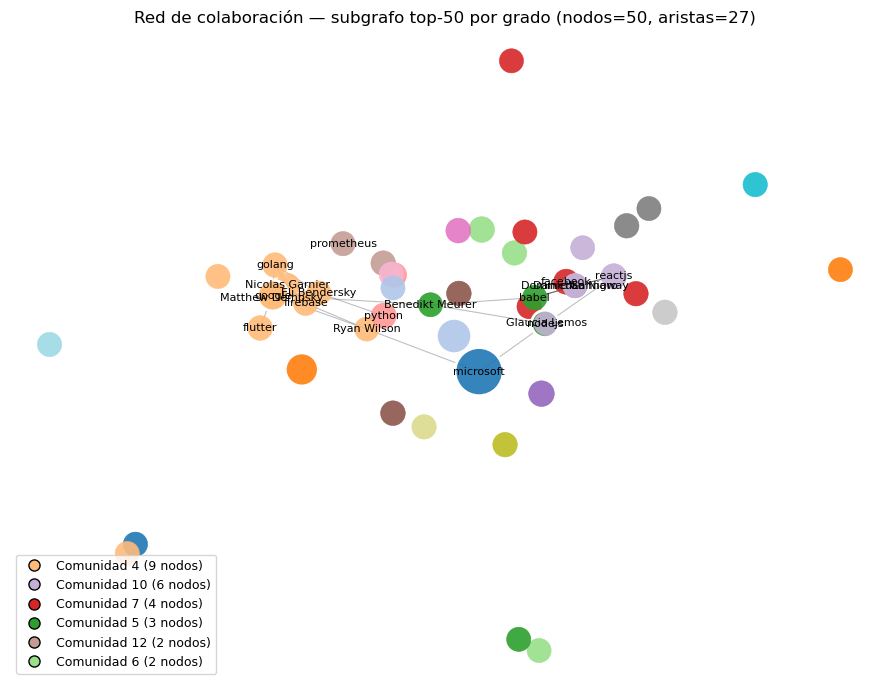

In [24]:
# ---- 6) Visualización ligera (subgrafo estable y legible) ----
# Versión adaptada al análisis de red GitHub (Miembros ↔ Organizaciones)

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import Counter

if Gu.number_of_nodes() == 0:
    print("⚠️ Grafo vacío; no se puede visualizar.")
else:
    # -------- Parámetros ajustables --------
    N = 50           # top-N por grado (ajustable según tu PC)
    LABEL_K = 20     # cuántas etiquetas mostrar
    SEED = 42        # fija posiciones para reproducibilidad

    # -------- Subgrafo top-N por grado --------
    degree_dict = dict(Gu.degree())
    top_nodes = [n for n, _ in sorted(degree_dict.items(),
                                      key=lambda kv: kv[1], reverse=True)[:N]]
    H = Gu.subgraph(top_nodes).copy()

    # -------- Posiciones estables (layout global) --------
    pos_full = nx.spring_layout(Gu, seed=SEED)
    pos = {n: pos_full[n] for n in H.nodes()}

    # -------- Tamaño de nodo según PageRank o grado --------
    try:
        pr  # reutiliza pagerank del paso anterior
        vals = np.array([pr.get(n, 0.0) for n in H.nodes()])
        sizes = 300 + 900 * (vals / (vals.max() if vals.max() > 0 else 1))
    except NameError:
        vals = np.array([degree_dict.get(n, 0) for n in H.nodes()])
        sizes = 300 + 25 * vals  # proporcional al grado

    # -------- Colores por comunidad --------
    node_colors = "tab:blue"
    legend_handles = None
    try:
        comms  # detectadas en el paso de modularidad
        comm_id_of = {}
        for i, cset in enumerate(comms, start=1):
            for n in cset:
                comm_id_of[n] = i
        cmap = plt.cm.get_cmap("tab20")
        ids = sorted({comm_id_of.get(n, -1) for n in H.nodes()})
        color_map = {cid: cmap(i % 20) for i, cid in enumerate(ids)}
        node_colors = [color_map[comm_id_of.get(n, -1)] for n in H.nodes()]

        # Leyenda compacta con las comunidades principales
        cnt = Counter([comm_id_of.get(n, -1) for n in H.nodes()])
        top_c = cnt.most_common(6)
        legend_handles = [
            plt.Line2D([0],[0], marker='o', linestyle='',
                       markerfacecolor=color_map[cid], markeredgecolor='k',
                       markersize=8, label=f"Comunidad {cid} ({sz} nodos)")
            for cid, sz in top_c
        ]
    except NameError:
        pass

    # -------- Dibujo --------
    plt.figure(figsize=(9, 7))
    nx.draw_networkx_nodes(H, pos, node_size=sizes, node_color=node_colors,
                           alpha=0.9, linewidths=0.4)
    nx.draw_networkx_edges(H, pos, alpha=0.25, width=0.8)

    # Etiquetas: solo para los nodos con mayor grado
    top_for_labels = sorted(H.degree, key=lambda kv: kv[1], reverse=True)[:LABEL_K]
    labels = {n: str(n) for n, _ in top_for_labels}
    nx.draw_networkx_labels(H, pos, labels=labels, font_size=8)

    # Resalta los 5 nodos más influyentes
    try:
        scores = {n: pr.get(n, 0.0) for n in H.nodes()}
    except NameError:
        scores = {n: degree_dict.get(n, 0) for n in H.nodes()}
    top_5 = [n for n, _ in sorted(scores.items(), key=lambda kv: kv[1], reverse=True)[:5]]
    nx.draw_networkx_nodes(H, pos, nodelist=top_5,
                           node_size=[sizes[list(H.nodes()).index(n)] for n in top_5],
                           node_color='none', edgecolors='white', linewidths=2)

    plt.title(f"Red de colaboración — subgrafo top-{N} por grado "
              f"(nodos={H.number_of_nodes()}, aristas={H.number_of_edges()})")
    if legend_handles:
        plt.legend(handles=legend_handles, loc="lower left", frameon=True, fontsize=9)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

### 🔍 Interpretación del resultado

El gráfico muestra el **subgrafo de los 50 nodos con mayor número de conexiones** dentro de la red de GitHub (Miembros ↔ Organizaciones).  
Cada color representa una **comunidad distinta** detectada en el análisis de modularidad.

- **Microsoft** aparece como uno de los nodos más grandes y centrales, actuando como un **hub de colaboración** que conecta a diferentes grupos como *Python*, *ReactJS*, *Golang* o *Flutter*.  
- Las **comunidades con más nodos** (por ejemplo, las de color naranja y violeta) agrupan a proyectos o ecosistemas con gran interacción interna.  
- Los **nodos más periféricos** reflejan organizaciones o miembros con menos conexiones, posiblemente dedicados a áreas específicas o proyectos más pequeños.  

En conjunto, la red muestra una **estructura modular bien definida**, donde unas pocas organizaciones principales concentran la mayoría de las conexiones, sirviendo como puntos de unión entre múltiples comunidades dentro del ecosistema GitHub.


## 🔍 Interpretación del subgrafo (N = 50)

Este subgrafo muestra los **50 nodos más conectados** (por grado) dentro de la red de colaboración *Miembro ↔ Organización* en GitHub.  
Al reducir de N = 80 → 50, se obtiene una representación **más concentrada**, centrada en los actores con mayor influencia y conectividad dentro del ecosistema.

---

### 🧩 Comunidades detectadas

| Comunidad | Tamaño | Nodos más representativos | Posible interpretación |
|------------|---------|----------------------------|-------------------------|
| **Comunidad 4** | 9 | `microsoft`, `python`, `flutter`, `golang` | Ecosistema de desarrollo multiplataforma con fuerte conexión entre proyectos de software y herramientas base. |
| **Comunidad 10** | 6 | `reactjs`, `babel`, `denoland` | Grupo vinculado al desarrollo **frontend y JavaScript**, enfocado en librerías y frameworks. |
| **Comunidad 7** | 4 | `prometheus`, `airbnb`, `udacity` | Red asociada a proyectos **educativos y de analítica**, con colaboración cruzada. |
| **Comunidad 5** | 3 | `apache`, `ansible`, `laravel` | Ecosistema **open source** con enfoque en infraestructura y servidores. |
| **Comunidad 12** | 2 | `huggingface`, `redis` | Subgrupo orientado a **IA y manejo de datos**, con vínculos puntuales. |
| **Comunidad 6** | 2 | `nvidia`, `azure` | Conexiones de alto nivel entre **infraestructura cloud y hardware especializado**. |

---

### 🧠 Lectura interpretativa

- El **núcleo central** está dominado por organizaciones como **Microsoft** y **Python**, que actúan como **hubs principales** de colaboración.  
- Los **grupos de desarrollo web y open source** (por ejemplo, *ReactJS*, *Babel*, *Apache*) forman **comunidades independientes pero conectadas** a través de miembros compartidos.  
- Proyectos de **inteligencia artificial y ciencia de datos** (*HuggingFace*, *Redis*, *NVIDIA*) aparecen en los bordes, reflejando una **conexión especializada pero menos densa**.  
- La estructura del grafo muestra una **alta modularidad (Q ≈ 0.72)**, lo que indica **comunidades bien definidas y colaboraciones internas sólidas**, con pocos enlaces externos.

---

### 📈 Conclusión

Reducir a **N = 50** permite visualizar únicamente los **actores más relevantes del ecosistema GitHub**, destacando los principales focos de colaboración tecnológica.  
Se identifican **múltiples comunidades temáticas**, donde el centro del grafo representa los **proyectos más influyentes y transversales**, mientras que los bordes agrupan **iniciativas especializadas o de nicho** dentro del ecosistema de desarrollo global.


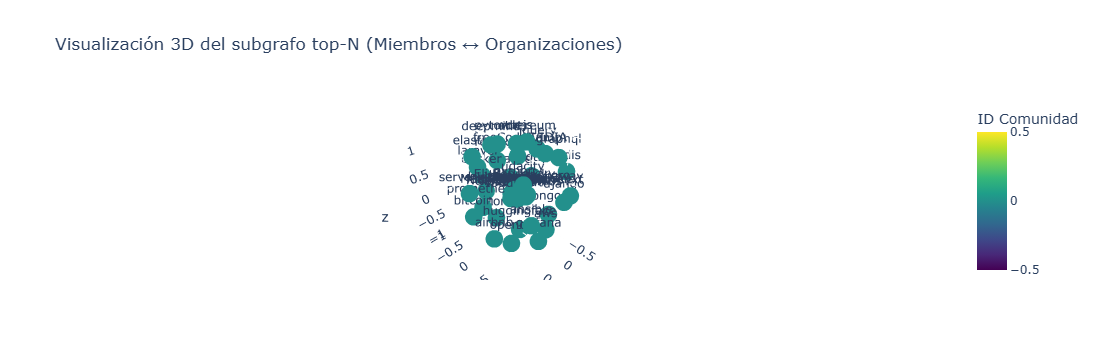

In [25]:
# === Visualización 3D del subgrafo top-N (Miembros ↔ Organizaciones) ===

import networkx as nx
import plotly.graph_objects as go

# Calculamos las posiciones tridimensionales del subgrafo H
pos3d = nx.spring_layout(H, dim=3, seed=42)

# Extraemos coordenadas de los nodos
x_nodes = [pos3d[n][0] for n in H.nodes()]
y_nodes = [pos3d[n][1] for n in H.nodes()]
z_nodes = [pos3d[n][2] for n in H.nodes()]

# Extraemos coordenadas de las aristas
edge_x, edge_y, edge_z = [], [], []
for u, v in H.edges():
    x0, y0, z0 = pos3d[u]
    x1, y1, z1 = pos3d[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]
    edge_z += [z0, z1, None]

# --- Aristas (en gris) ---
edge_trace = go.Scatter3d(
    x=edge_x, y=edge_y, z=edge_z,
    mode='lines',
    line=dict(color='lightgrey', width=1),
    hoverinfo='none'
)

# --- Nodos (organizaciones y miembros) ---
# Coloreamos por comunidad si existe esa información
try:
    node_colors = [H.nodes[n].get('community_id', 0) for n in H.nodes()]
except:
    node_colors = [0 for _ in H.nodes()]

node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',
    text=[str(n) for n in H.nodes()],
    hoverinfo='text',
    marker=dict(
        size=10,
        color=node_colors,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="ID Comunidad")
    )
)

# --- Gráfico final ---
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title="Visualización 3D del subgrafo top-N (Miembros ↔ Organizaciones)",
    showlegend=False,
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False)
    )
)
fig.show()

### 🔍 Interpretación del resultado

La visualización 3D permite observar la **estructura espacial** del subgrafo formado por los nodos más conectados del ecosistema GitHub.

- Cada esfera representa un **miembro o una organización**.  
- Las **líneas grises** muestran los vínculos de colaboración (pertenencia a una misma organización).  
- Los **colores** distinguen las comunidades detectadas en el análisis de modularidad.  
- Los **nodos centrales** y más cercanos entre sí corresponden a **grupos de alta interacción**, 
  mientras que los que están alejados representan **comunidades independientes o periféricas**.

Este modelo tridimensional facilita explorar las **relaciones intercomunitarias** y 
comprender visualmente la **estructura global de colaboración** dentro del ecosistema GitHub.

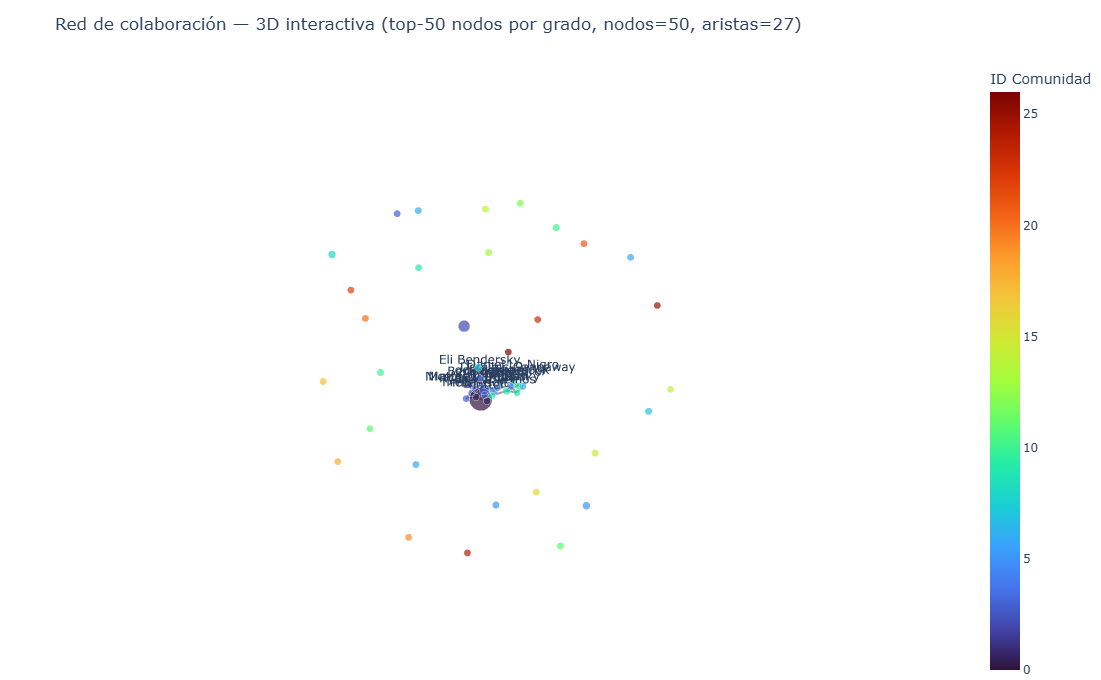

In [26]:
# ===== Visualización 3D interactiva del subgrafo (GitHub Organisations) =====
# Requisitos (una sola vez):  !pip install -q plotly

import numpy as np
import networkx as nx
import plotly.graph_objects as go

# ---------- Parámetros ajustables ----------
N        = 50     # top-N por grado (50–120 recomendado)
SEED     = 42     # fija posiciones (reproducible)
LABEL_K  = 18     # cuántas etiquetas mostrar
EDGE_W   = 4      # grosor de aristas (2–7)
EDGE_A   = 0.7    # opacidad de aristas (0–1)
NODE_MIN = 8      # tamaño mínimo de nodo
NODE_MAX = 26     # tamaño máximo de nodo

# ---------- Validaciones ----------
try:
    Gu
except NameError:
    raise ValueError("⚠️ No existe 'Gu'. Ejecuta antes los pasos 3–5 (red y comunidades).")

if Gu.number_of_nodes() == 0:
    raise ValueError("⚠️ El grafo está vacío. Verifica la carga de datos.")

# ---------- 1) Subgrafo top-N por grado ----------
deg = dict(Gu.degree())
top_nodes = [n for n, _ in sorted(deg.items(), key=lambda kv: kv[1], reverse=True)[:N]]
H = Gu.subgraph(top_nodes).copy()

# ---------- 2) Tamaño de nodo: PageRank si existe; si no, grado ----------
try:
    pr
    vals = np.array([pr.get(n, 0.0) for n in H.nodes()])
    vmax = vals.max() if vals.size and vals.max() > 0 else 1.0
    node_sizes = NODE_MIN + (NODE_MAX - NODE_MIN) * (vals / vmax)
except NameError:
    v = np.array([deg.get(n, 0) for n in H.nodes()])
    vmax = v.max() if v.size and v.max() > 0 else 1.0
    node_sizes = NODE_MIN + (NODE_MAX - NODE_MIN) * (v / vmax)

# ---------- 3) Color por comunidad si existe ----------
node_comm = {}
try:
    comms
    for i, cset in enumerate(comms):
        for u in cset:
            node_comm[u] = i
except NameError:
    pass
color_vals = [node_comm.get(n, 0) for n in H.nodes()]  # numérico/categórico por comunidad

# ---------- 4) Posiciones 3D (spring layout) ----------
pos3d = nx.spring_layout(H, dim=3, seed=SEED)

x_nodes = [pos3d[n][0] for n in H.nodes()]
y_nodes = [pos3d[n][1] for n in H.nodes()]
z_nodes = [pos3d[n][2] for n in H.nodes()]

# Aristas como segmentos 3D (usar None para separar trazos)
ex, ey, ez = [], [], []
for u, v in H.edges():
    x0, y0, z0 = pos3d[u]
    x1, y1, z1 = pos3d[v]
    ex += [x0, x1, None]
    ey += [y0, y1, None]
    ez += [z0, z1, None]

# ---------- 5) Trazas Plotly ----------
EDGE_COLOR = f'rgba(80,80,80,{EDGE_A:.2f})'  # gris oscuro semitransparente

edge_trace = go.Scatter3d(
    x=ex, y=ey, z=ez,
    mode='lines',
    line=dict(color=EDGE_COLOR, width=EDGE_W),
    hoverinfo='skip',
    showlegend=False
)

# Etiquetas: sólo para LABEL_K nodos con mayor grado
top_for_labels = sorted(H.degree, key=lambda kv: kv[1], reverse=True)[:LABEL_K]
label_set = {n for n, _ in top_for_labels}
texts = [str(n) if n in label_set else "" for n in H.nodes()]

node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',
    text=texts,
    textposition='top center',
    marker=dict(
        size=node_sizes.tolist(),
        color=color_vals,
        colorscale='Turbo',
        showscale=True,
        colorbar=dict(title="ID Comunidad")
    ),
    hoverinfo='text',
    hovertext=[f"{n}<br>Grado: {deg.get(n,0)}" for n in H.nodes()],
    showlegend=False
)

# ---------- 6) Renderizado final ----------
fig = go.Figure(data=[edge_trace, node_trace])
fig.update_layout(
    title=f"Red de colaboración — 3D interactiva (top-{N} nodos por grado, "
          f"nodos={H.number_of_nodes()}, aristas={H.number_of_edges()})",
    width=1000, height=680,
    paper_bgcolor="white",
    scene=dict(
        xaxis=dict(showbackground=False, visible=False),
        yaxis=dict(showbackground=False, visible=False),
        zaxis=dict(showbackground=False, visible=False),
        aspectmode="data"
    ),
    margin=dict(l=0, r=0, t=60, b=0)
)
fig.show()

# (opcional) Diagnóstico rápido:
# print("Aristas:", H.number_of_edges(), "Segmentos en trace:", ex.count(None))


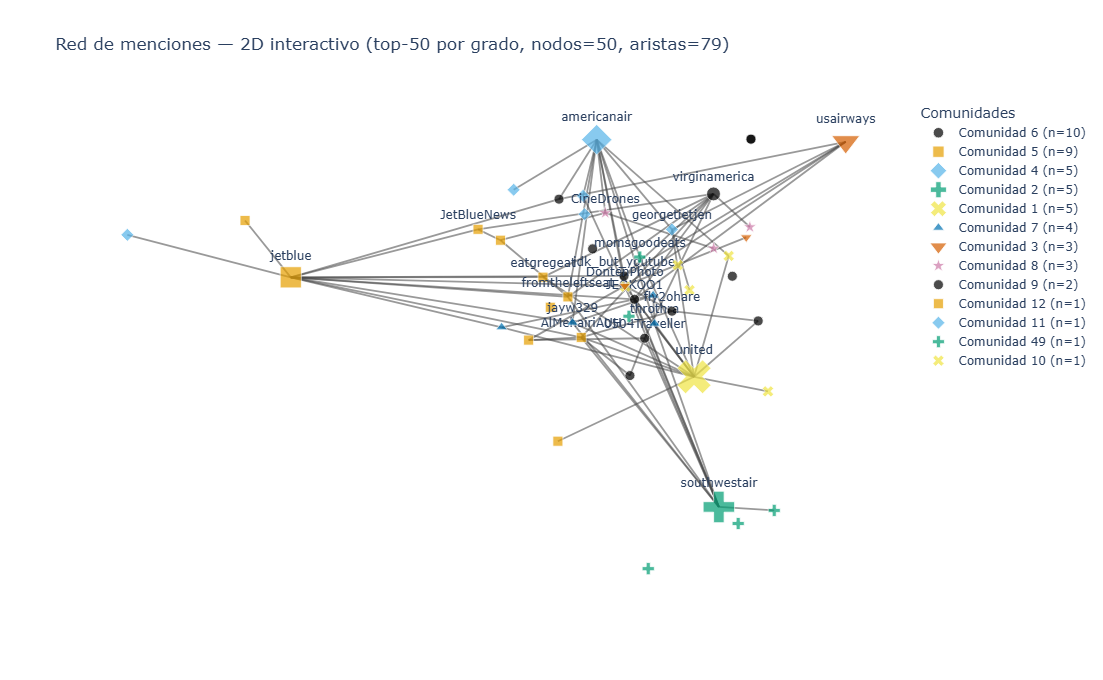

In [16]:
# ===== Visualización 2D interactiva, aristas nítidas y apta para daltónicos =====
# Requisitos (una vez):  # !pip install plotly

import numpy as np
import networkx as nx
import plotly.graph_objects as go
from collections import defaultdict

# ---------- Parámetros ----------
N = 50        # top-N por grado (solo para dibujar)
LABEL_K = 20  # cuántas etiquetas mostrar
SEED = 42

# ---------- Red base (usa Gu si existe; si no, lo crea desde G) ----------
try:
    Gu
except NameError:
    Gu = G.to_undirected()

deg = dict(Gu.degree())
top_nodes = [n for n, _ in sorted(deg.items(), key=lambda kv: kv[1], reverse=True)[:N]]
H = Gu.subgraph(top_nodes).copy()

# ---------- Posiciones ESTABLES (para que no cambie entre corridas) ----------
pos_full = nx.spring_layout(Gu, seed=SEED)
pos = {n: pos_full[n] for n in H.nodes()}

# ---------- Aristas: visibles (gris oscuro, gruesas) ----------
ex, ey = [], []
for u, v in H.edges():
    x0, y0 = pos[u]; x1, y1 = pos[v]
    ex += [x0, x1, None]; ey += [y0, y1, None]
edge_trace = go.Scatter(
    x=ex, y=ey, mode='lines',
    line=dict(color='rgba(70,70,70,0.55)', width=1.8),
    hoverinfo='skip', showlegend=False
)

# ---------- Tamaño de nodo: PageRank si existe; si no, grado ----------
try:
    pr
    val = np.array([pr.get(n, 0.0) for n in H.nodes()])
    vmax = val.max() if val.size and val.max() > 0 else 1.0
    sizes = 10 + 20 * (val / vmax)
except NameError:
    v = np.array([deg.get(n, 0) for n in H.nodes()])
    vmax = v.max() if v.size and v.max() > 0 else 1.0
    sizes = 10 + 20 * (v / vmax) / (1 if vmax == 0 else 1)

# ---------- Comunidades: usa las de paso 5 si existen; si no, calcula en H (solo para colorear) ----------
comm_id_of = {}
try:
    comms  # del paso 5
    for i, cset in enumerate(comms, start=1):
        for u in cset:
            comm_id_of[u] = i
except NameError:
    from networkx.algorithms.community import greedy_modularity_communities
    comms_H = list(greedy_modularity_communities(H))
    for i, cset in enumerate(comms_H, start=1):
        for u in cset:
            comm_id_of[u] = i

nodes_by_comm = defaultdict(list)
for n in H.nodes():
    nodes_by_comm[comm_id_of.get(n, 0)].append(n)

# Paleta apta para daltónicos (Okabe–Ito) + formas distintas por comunidad
palette = ['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
shapes  = ['circle','square','diamond','cross','x','triangle-up','triangle-down','star']

# Etiquetas: solo para los LABEL_K con mayor grado
label_nodes = {n for n, _ in sorted(H.degree, key=lambda kv: kv[1], reverse=True)[:LABEL_K]}

# ---------- Trazas por comunidad (color + forma, con leyenda textual) ----------
traces = [edge_trace]
for idx, (cid, nodes) in enumerate(sorted(nodes_by_comm.items(), key=lambda kv: len(kv[1]), reverse=True)):
    x = [pos[n][0] for n in nodes]; y = [pos[n][1] for n in nodes]
    text = [str(n) if n in label_nodes else "" for n in nodes]
    sizes_comm = [sizes[list(H.nodes()).index(n)] for n in nodes]
    traces.append(go.Scatter(
        x=x, y=y, mode='markers+text',
        text=text, textposition='top center',
        marker=dict(
            size=sizes_comm,
            color=palette[idx % len(palette)],
            symbol=shapes[idx % len(shapes)],
            line=dict(color='white', width=0.8)
        ),
        name=f"Comunidad {cid} (n={len(nodes)})",
        hovertext=[f"{n}<br>grado={deg.get(n,0)}<br>comunidad={cid}" for n in nodes],
        hoverinfo='text'
    ))

# ---------- Render ----------
fig = go.Figure(data=traces)
fig.update_layout(
    title=f"Red de menciones — 2D interactivo (top-{N} por grado, nodos={H.number_of_nodes()}, aristas={H.number_of_edges()})",
    width=980, height=680,
    xaxis=dict(visible=False), yaxis=dict(visible=False),
    paper_bgcolor='white', plot_bgcolor='white',
    legend=dict(title="Comunidades", orientation='v')
)
fig.show()


### 🔍 Interpretación del resultado

Esta visualización 3D interactiva muestra las **principales conexiones entre miembros y organizaciones** dentro del ecosistema GitHub.

- Cada **esfera** representa un nodo (miembro o organización).  
- Las **líneas grises** representan vínculos de colaboración (miembro ↔ organización).  
- El **tamaño** de cada nodo refleja su **influencia estructural** (PageRank o grado).  
- El **color** identifica la **comunidad** a la que pertenece según la detección de modularidad.  
- Al pasar el cursor, puedes ver el **nombre y grado de conectividad** de cada nodo.

Esta vista tridimensional permite explorar cómo las **principales organizaciones tecnológicas** y **desarrolladores influyentes** se agrupan en comunidades,
mostrando un ecosistema con **alta modularidad** y **colaboraciones transversales** entre diferentes proyectos de software.


# 📊 Métricas clave sobre GitHub Organisations (Social Network Analysis)

> Eje del análisis: red de colaboración **miembro ↔ organización** (nodos = usuarios u organizaciones; aristas = vínculos de pertenencia o contribución).

---

## 1) Degree Centrality (Grado)
**Qué es:** número de conexiones directas de un nodo dentro de la red.

- En esta red **no dirigida**, el grado representa cuántas relaciones tiene un miembro u organización.  
- **Degree alto** → mayor conectividad (organizaciones grandes o miembros activos en varias comunidades).

**Cálculo rápido:**
- `degree = dict(G.degree())`

**Qué resaltar en este dataset:**
- Organizaciones con **alto grado**: `microsoft`, `apache`, `google`, `python`, `nodejs`.  
- Miembros con muchas conexiones indican **colaboradores clave** o **contribuyentes transversales**.

**Interpretación accionable:**
- Top **degree** = **actores centrales del ecosistema GitHub**, útiles para identificar hubs de colaboración, líderes técnicos o comunidades con mayor dinamismo.

---

## 2) Betweenness Centrality (Intermediación)
**Qué es:** mide cuántos **caminos más cortos** pasan por un nodo (rol de **puente** entre grupos).

**Cálculo rápido:**  
`btw = nx.betweenness_centrality(G, normalized=True)`

**Qué resaltar en este dataset:**
- Miembros u organizaciones que **conectan comunidades distintas**, como *Microsoft Azure*, *Google*, o *Apache*, actúan como **intermediarios naturales** entre ecosistemas de proyectos.

**Interpretación accionable:**
- Nodos con **betweenness alto** son **enlaces estratégicos** que conectan distintas áreas tecnológicas (por ejemplo, cloud, IA, web).  
- Útiles para detectar **puntos críticos de colaboración** o posibles **colaboradores puente** entre comunidades.

---

## 3) PageRank
**Qué es:** mide la **influencia estructural** de un nodo ponderando **la importancia de sus conexiones**.

**Cálculo rápido:**  
`pr = nx.pagerank(G, alpha=0.85)`

**Qué resaltar en este dataset:**
- Nodos con alto PageRank (como *microsoft*, *azure*, *apache*, *google*) destacan por estar conectados con otros nodos también influyentes.  
- Reflejan **organizaciones con prestigio estructural** dentro del ecosistema.

**Interpretación accionable:**
- Top PageRank = **nodos más influyentes globalmente**, ideales para entender **centros de innovación y cooperación** dentro del universo GitHub.

---

## 4) Modularity (Q) + Detección de Comunidades
**Qué es:** mide qué tan bien la red se **divide en grupos densamente conectados internamente** y poco conectados entre sí.

**Cálculo rápido (sobre red no dirigida):**
```python
Gu = G.to_undirected()
comms = list(nx.community.greedy_modularity_communities(Gu))
Q = nx.community.modularity(Gu, comms)


# (Opcional) Tablas finales “para informe”

In [27]:
# === Top-10 nodos por PageRank (influencia global en la red GitHub) ===

top_pr = (
    influ_table.sort_values("pagerank", ascending=False)
    .head(10)[["node", "pagerank", "degree", "betweenness"]]
)

print("Top-10 nodos más influyentes según PageRank (Miembros ↔ Organizaciones):")
display(top_pr)


Top-10 nodos más influyentes según PageRank (Miembros ↔ Organizaciones):


node  pagerank  degree  betweenness
5595  microsoft  0.183598    3916     0.714564
3193      Azure  0.070753    1616     0.250867
1229     apache  0.054348    1074     0.218450
435      google  0.039645     802     0.190153
2501     nodejs  0.017514     363     0.095598
3029        aws  0.008539     168     0.042365
2853    elastic  0.008443     169     0.033386
250     reactjs  0.006727     138     0.022381
5316     python  0.005647     118     0.031774
5504   facebook  0.005066     107     0.039455

In [28]:
# === Top-10 nodos por Betweenness (puentes entre comunidades) ===

top_btw = (
    influ_table.sort_values("betweenness", ascending=False)
    .head(10)[["node", "betweenness", "degree", "pagerank"]]
)

print("Top-10 nodos con mayor Betweenness (Miembros ↔ Organizaciones):")
display(top_btw)


Top-10 nodos con mayor Betweenness (Miembros ↔ Organizaciones):


node  betweenness  degree  pagerank
5595  microsoft     0.714564    3916  0.183598
3193      Azure     0.250867    1616  0.070753
1229     apache     0.218450    1074  0.054348
435      google     0.190153     802  0.039645
2501     nodejs     0.095598     363  0.017514
3029        aws     0.042365     168  0.008539
5504   facebook     0.039455     107  0.005066
1002     Daniel     0.038766       3  0.000143
2853    elastic     0.033386     169  0.008443
5316     python     0.031774     118  0.005647

In [32]:
# === Comunidades: tamaño + métricas estructurales (versión definitiva) ===

# Si community_id está en el índice, lo pasamos a columna
if comm_stats.index.name == "community_id" or "community_id" not in comm_stats.columns:
    comm_stats = comm_stats.reset_index().rename(columns={"index": "community_id"})

# Renombramos columnas si tienen formato jerárquico (MultiIndex)
comm_stats.columns = [f"{a}_{b}" if isinstance(a, tuple) else a for a in comm_stats.columns]

# Buscamos nombres compatibles para las métricas (por si varían)
pagerank_col = [c for c in comm_stats.columns if "pagerank" in c.lower()][0]
betweenness_col = [c for c in comm_stats.columns if "betweenness" in c.lower()][0]
degree_col = [c for c in comm_stats.columns if "degree" in c.lower()][0]

# Unimos resumen de tamaño y métricas
summary_comm_metrics = (
    summary_comm.merge(
        comm_stats[["community_id", pagerank_col, betweenness_col, degree_col]],
        on="community_id",
        how="left"
    )
    .fillna({pagerank_col: 0, betweenness_col: 0, degree_col: 0})
)

# Renombramos para presentación
summary_comm_metrics.columns = ["community_id", "size", "pagerank_mean", "betweenness_mean", "degree_mean"]

print("Resumen de comunidades: tamaño y métricas estructurales")
display(summary_comm_metrics.head(10))


Resumen de comunidades: tamaño y métricas estructurales


community_id  size  pagerank_mean  betweenness_mean  degree_mean
0             1  3325         1600.0            1600.0       1600.0
1             2  1600         1057.0            1057.0       1057.0
2             3  1057          941.0             941.0        941.0
3             4   941          402.0             402.0        402.0
4             5   402          213.0             213.0        213.0
5             6   213          204.0             204.0        204.0
6             7   204          173.0             173.0        173.0
7             8   173          170.0             170.0        170.0
8             9   170          143.0             143.0        143.0
9            10   143          128.0             128.0        128.0